### Final project -->3
Below table contains the information of customer and their geographical and personal details , Build the classification models like Decision Tree , Random forest , KNN , kmeans and SVM to classify the data in to proper groups.

In [99]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [100]:
data = pd.read_excel("Data set full.xlsx","customer data")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [101]:
len(data)

48842

In [9]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [11]:
dt = (data.isnull().sum()/len(data))*100
dt

age               0.000000
workclass         1.971664
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        1.977806
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.560993
income            0.000000
dtype: float64

In [102]:
#null value treatment 
data["workclass"]= data["workclass"].fillna(data["workclass"].mode()[0])
data["occupation"]= data["occupation"].fillna(data["occupation"].mode()[0])
data["native-country"] = data["native-country"].bfill()

In [103]:
dt = (data.isnull().sum()/len(data))*100
dt

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64

In [14]:
data["income"].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [104]:
data["income"] = data["income"].replace('<=50K.','<=50K')

In [105]:
data["income"] = data["income"].replace('>50K.','>50K')

In [17]:
data["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [39]:
print(data["income"].unique())

['<=50K' '>50K']


In [18]:
print(data["income"].value_counts())

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [42]:
data["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [43]:
data["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [44]:
data["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [45]:
data["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [46]:
data["relationship"].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [47]:
data["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [48]:
data["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [49]:
data["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [106]:
#encoding

# Encoding categorical variables
#le = LabelEncoder()
#df_encoded = df.apply(le.fit_transform)

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data["workclass"]=le.fit_transform(data["workclass"])
data["education"]=le.fit_transform(data["education"])
data["marital-status"]=le.fit_transform(data["marital-status"])
data["occupation"]=le.fit_transform(data["occupation"])
data["race"]=le.fit_transform(data["race"])
data["sex"]=le.fit_transform(data["sex"])
data["native-country"]=le.fit_transform(data["native-country"])
data["relationship"]=le.fit_transform(data["relationship"])

In [20]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K


In [107]:
Y = data["income"]
Y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [108]:
Y = Y.replace("<=50K","0")
Y = Y.replace(">50K","1")

In [109]:
Y.value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

In [24]:
X = data[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]

In [25]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,40,5


In [26]:
X.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country
age,1.000000,0.018633,-0.076628,-0.015058,0.030940,-0.263978,-0.014973,-0.263383,0.028421,0.077229,0.056944,0.071558,-0.003035
workclass,0.018633,1.000000,-0.020496,0.018137,0.041233,-0.051690,0.195413,-0.079365,0.053720,0.032844,0.010761,0.111070,-0.004375
fnlwgt,-0.076628,-0.020496,1.000000,-0.022570,-0.038761,0.029851,-0.001289,0.009092,-0.027062,-0.003706,-0.004366,-0.013519,-0.050621
education,-0.015058,0.018137,-0.022570,1.000000,0.359668,-0.037417,-0.021927,-0.010758,0.013250,0.028928,0.017638,0.057659,0.065785
education-num,0.030940,0.041233,-0.038761,0.359668,1.000000,-0.069992,0.098666,-0.090534,0.029239,0.125146,0.080972,0.143689,0.060733
marital-status,-0.263978,-0.051690,0.029851,-0.037417,-0.069992,1.000000,0.000691,0.187800,-0.070104,-0.043969,-0.033872,-0.185567,-0.019942
occupation,-0.014973,0.195413,-0.001289,-0.021927,0.098666,0.000691,1.000000,-0.061133,0.002961,0.019668,0.016679,0.047604,-0.006635
relationship,-0.263383,-0.079365,0.009092,-0.010758,-0.090534,0.187800,-0.061133,1.000000,-0.117041,-0.056510,-0.057201,-0.250400,-0.004067
race,0.028421,0.053720,-0.027062,0.013250,0.029239,-0.070104,0.002961,-0.117041,1.000000,0.011581,0.018595,0.039694,0.132849
capital-gain,0.077229,0.032844,-0.003706,0.028928,0.125146,-0.043969,0.019668,-0.056510,0.011581,1.000000,-0.031441,0.082157,0.000419


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,random_state=42)
len(X_train),len(X_test),len(Y_train),len(Y_test)

(39073, 9769, 39073, 9769)

 DECISION TREE

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
#GINI INDEX CRITERION
model = DecisionTreeClassifier(criterion="gini",max_depth=4)

In [31]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

In [32]:
pred = model.predict(X_test)

In [33]:
model.score(X_test,Y_test)

0.8416419285494933

In [34]:
pd.Series(pred).value_counts() # getting the count of each category 

0    8195
1    1574
Name: count, dtype: int64

In [35]:
# Evaluating the model
accuracy = accuracy_score(Y_test, pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


In [36]:
# Displaying the confusion matrix and classification report
conf_matrix = confusion_matrix(Y_test, pred)
class_report = classification_report(Y_test, pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[7031  383]
 [1164 1191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7414
           1       0.76      0.51      0.61      2355

    accuracy                           0.84      9769
   macro avg       0.81      0.73      0.75      9769
weighted avg       0.83      0.84      0.83      9769



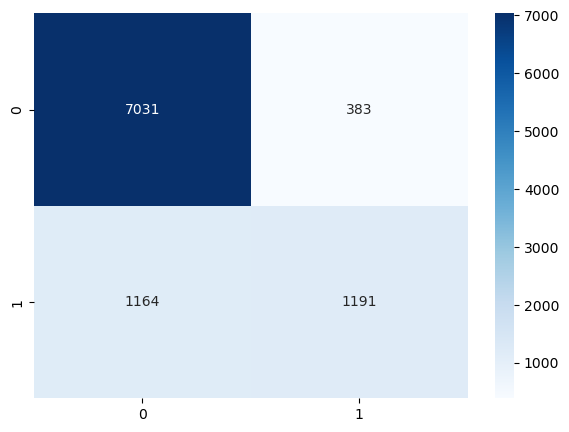

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix,annot=True,fmt='g',cmap='Blues')
plt.xlabel="Predicted"
plt.ylabel="Actual"
plt.show()

[Text(0.5, 0.9, 'x[7] <= 0.5\ngini = 0.364\nsamples = 39073\nvalue = [29741, 9332]'),
 Text(0.25, 0.7, 'x[4] <= 12.5\ngini = 0.495\nsamples = 15748\nvalue = [8658, 7090]'),
 Text(0.125, 0.5, 'x[9] <= 5095.5\ngini = 0.445\nsamples = 10995\nvalue = [7329, 3666]'),
 Text(0.0625, 0.3, 'x[4] <= 8.5\ngini = 0.42\nsamples = 10454\nvalue = [7318, 3136]'),
 Text(0.03125, 0.1, 'gini = 0.201\nsamples = 1807\nvalue = [1602, 205]'),
 Text(0.09375, 0.1, 'gini = 0.448\nsamples = 8647\nvalue = [5716, 2931]'),
 Text(0.1875, 0.3, 'x[0] <= 61.5\ngini = 0.04\nsamples = 541\nvalue = [11, 530]'),
 Text(0.15625, 0.1, 'gini = 0.004\nsamples = 478\nvalue = [1, 477]'),
 Text(0.21875, 0.1, 'gini = 0.267\nsamples = 63\nvalue = [10, 53]'),
 Text(0.375, 0.5, 'x[9] <= 5095.5\ngini = 0.403\nsamples = 4753\nvalue = [1329, 3424]'),
 Text(0.3125, 0.3, 'x[10] <= 1782.5\ngini = 0.442\nsamples = 4017\nvalue = [1327, 2690]'),
 Text(0.28125, 0.1, 'gini = 0.463\nsamples = 3604\nvalue = [1313, 2291]'),
 Text(0.34375, 0.1, 'gin

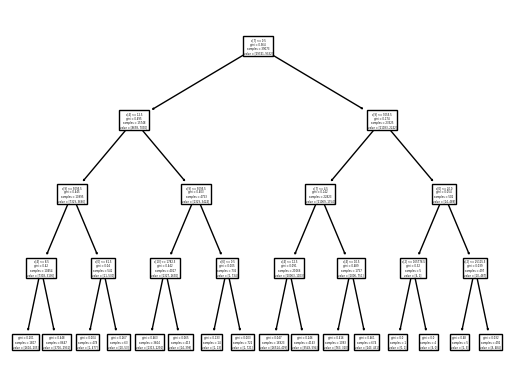

In [104]:
tree.plot_tree(model)

In [92]:

#ENTROPY CRITERION
model_en = DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [93]:
model_en.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [94]:
pred_en = model.predict(X_test)

In [95]:
# Evaluating the model
accuracy = accuracy_score(Y_test, pred_en)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


In [96]:
# Displaying the confusion matrix and classification report
conf_matrix = confusion_matrix(Y_test, pred_en)
class_report = classification_report(Y_test, pred_en)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[7032  382]
 [1164 1191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7414
           1       0.76      0.51      0.61      2355

    accuracy                           0.84      9769
   macro avg       0.81      0.73      0.75      9769
weighted avg       0.83      0.84      0.83      9769



In [ ]:
RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model1 = RandomForestClassifier(n_estimators=100)
#bootstrap=True,max_depth=None,oob_score=True,

In [40]:
model1.fit(X_train, Y_train)

RandomForestClassifier()

In [41]:
Y_predicted = model1.predict(X_test)

In [42]:
# Evaluating the model
accuracy = accuracy_score(Y_test,Y_predicted)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


In [45]:
# Displaying the confusion matrix and classification report
cm = confusion_matrix(Y_test, Y_predicted)
class_report = classification_report(Y_test, Y_predicted)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[6916  498]
 [ 938 1417]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7414
           1       0.74      0.60      0.66      2355

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769



In [46]:
model1.score(X_test, Y_test)

0.8530044016787798

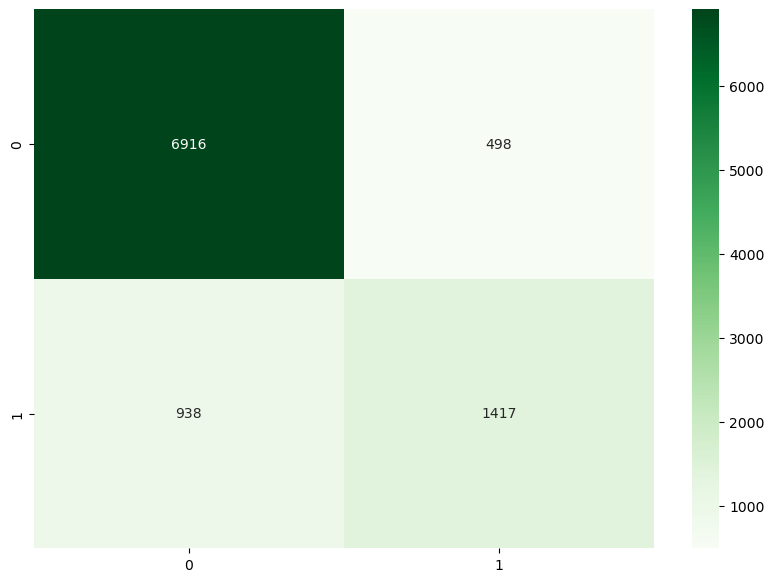

In [65]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='g',cmap="Greens")
#plt.xlabel('Predicted')
#plt.ylabel('Truth')
plt.show() 


KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [51]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [52]:
knn.score(X_test, Y_test)

0.7957825775412017

In [53]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)

In [54]:
cmat = confusion_matrix(Y_test, y_pred)
cmat

array([[7223,  191],
       [1804,  551]], dtype=int64)

In [55]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7414
           1       0.74      0.23      0.36      2355

    accuracy                           0.80      9769
   macro avg       0.77      0.60      0.62      9769
weighted avg       0.79      0.80      0.75      9769



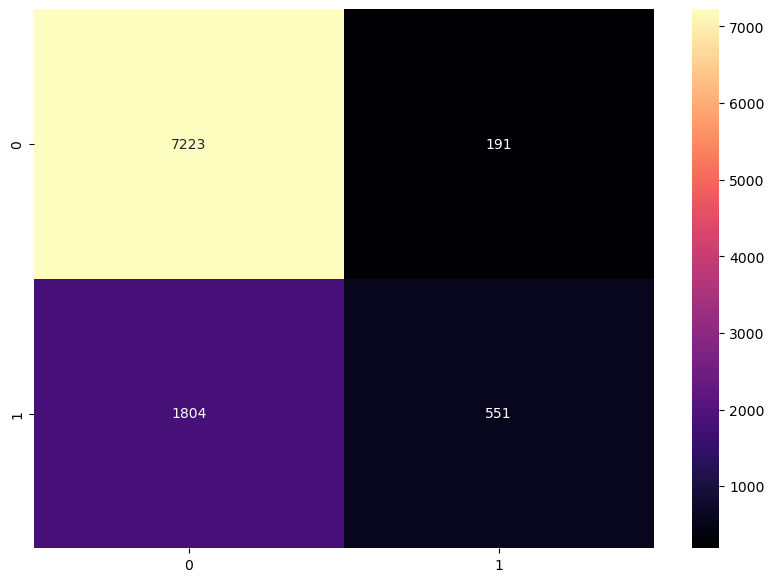

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cmat, annot=True,fmt='g',cmap="magma")
#plt.xlabel('Predicted')
#plt.ylabel('Truth')
plt.show() 


k means clustering

In [148]:
from sklearn.cluster import KMeans

In [149]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,cluster
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K,1
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K,1
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K,2


In [112]:
x = data.drop("income",axis = "columns")

In [114]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [156]:
x.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [69]:
y = data["income"]
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [71]:
y = y.replace("<=50K","0")
y = y.replace(">50K","1")

In [72]:
y.value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

In [115]:
#CHOOSING NUMBER OF CLUSTERS
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

In [116]:
sse

[547405318743801.4,
 226698366574440.75,
 122744815555317.25,
 81040053299198.94,
 58347685899643.05,
 42042304615237.28,
 31863983558921.7,
 25743683146617.312,
 20798906115537.676]

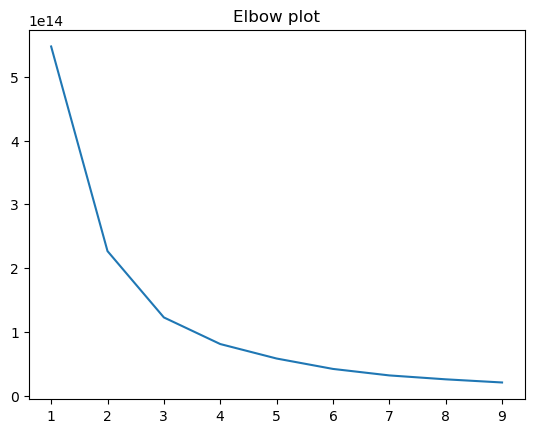

In [117]:
#plt.xlabel('Number of clusters')
#plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.title("Elbow plot")
plt.show()

In [ ]:
OPTIMAL NUMBER OF CLUSTERS = 3

In [118]:
km = KMeans(n_clusters=3)
km.fit(x)

KMeans(n_clusters=3)

In [119]:
ypred = km.fit_predict(x)
ypred

array([0, 0, 1, ..., 2, 0, 1])

In [126]:
km.cluster_centers_

array([[3.97011095e+01, 3.98733610e+00, 9.33005282e+04, 1.03406926e+01,
        1.01605402e+01, 2.57267735e+00, 6.76599798e+00, 1.43298218e+00,
        3.65437633e+00, 6.58074639e-01, 1.13062345e+03, 8.77614031e+01,
        4.05560910e+01, 3.74159476e+01],
       [3.84909817e+01, 3.93319319e+00, 2.05151774e+05, 1.02792937e+01,
        1.00585243e+01, 2.63464368e+00, 6.78776540e+00, 1.45070423e+00,
        3.69909607e+00, 6.67185201e-01, 1.05273895e+03, 8.82830355e+01,
        4.03696447e+01, 3.67375657e+01],
       [3.65297462e+01, 3.90833449e+00, 3.77062750e+05, 1.01891555e+01,
        9.93856608e+00, 2.68034947e+00, 6.75842463e+00, 1.44432118e+00,
        3.59950076e+00, 6.98516156e-01, 1.03831910e+03, 8.42859520e+01,
        4.02654278e+01, 3.65610872e+01]])

In [161]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(x, ypred)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.5515197727341593


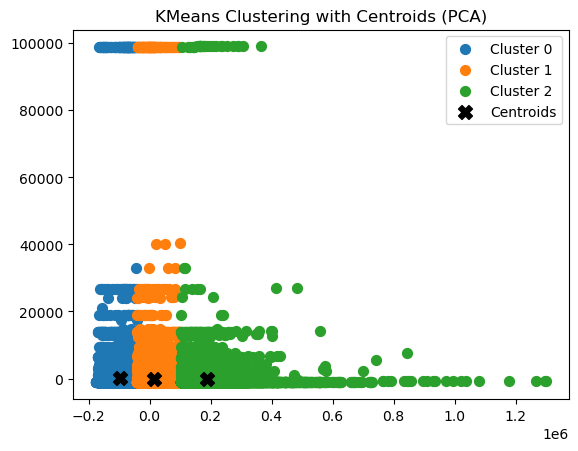

In [158]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#  x is the data with multiple features
# ypred and km.cluster_centers_ are defined

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Scatter plot of data points for each cluster
for cluster_label in np.unique(ypred):
    plt.scatter(x_pca[ypred == cluster_label, 0], x_pca[ypred == cluster_label, 1], s=50, label=f'Cluster {cluster_label}')

# Scatter plot of cluster centers
cluster_centers_pca = pca.transform(km.cluster_centers_)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], s=100, color="black", marker='X', label="Centroids")

#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with Centroids (PCA)')
plt.legend()
plt.show()


In [123]:
data["cluster"].unique()

array([0, 1, 2])

In [163]:
km.score(x)

-122745187826549.38

SVM

In [57]:
from sklearn.svm import SVC
model_s = SVC()

In [58]:
model_s.fit(X_train,Y_train)

SVC()

In [59]:
pred_y = model_s.predict(X_test)

In [60]:
accuracy_score(Y_test,pred_y)

0.7971133176374245

In [61]:
conf_mat = confusion_matrix(Y_test,pred_y)
conf_mat

array([[7402,   12],
       [1970,  385]], dtype=int64)

In [62]:
print(classification_report(Y_test, pred_y))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      7414
           1       0.97      0.16      0.28      2355

    accuracy                           0.80      9769
   macro avg       0.88      0.58      0.58      9769
weighted avg       0.83      0.80      0.74      9769



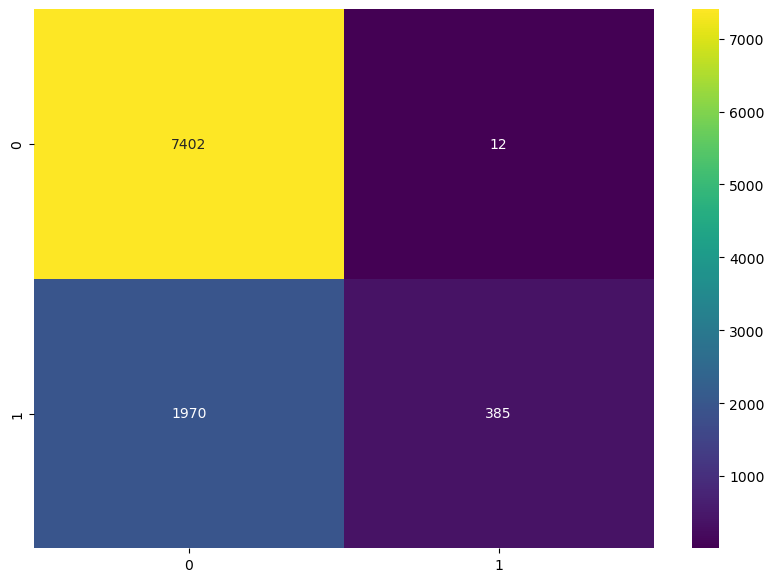

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(conf_mat, annot=True,fmt='g',cmap="viridis")
#plt.xlabel('Predicted')
#plt.ylabel('Truth')
plt.show() 
